# PCA (10 marks):

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA, PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn import metrics
import time
import matplotlib
plt.rcParams.update({'font.size': 20})

In [13]:
# Load the fashion-MNIST dataset

import mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

(60000, 784)
(60000,)


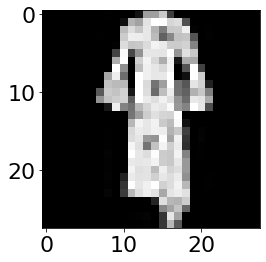

In [14]:
# Explore the dataset

print(X_train.shape)
print(y_train.shape)
index = np.random.randint(0, X_train.shape[0])
first_image = np.array(X_train[index], dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [15]:
def sort_evals_descending(evals, evectors):
    index = np.flip(np.argsort(evals))
    evals = evals[index]
    evectors = evectors[:, index]
    if evals.shape[0] == 2:
        if np.arccos(np.matmul(evectors[:, 0], 1 / np.sqrt(2) * np.array([1, 1]))) > np.pi / 2:
            evectors[:, 0] = -evectors[:, 0]
        if np.arccos(np.matmul(evectors[:, 1], 1 / np.sqrt(2) * np.array([-1, 1]))) > np.pi / 2:
            evectors[:, 1] = -evectors[:, 1]
    return evals, evectors

In [16]:
def pca(X):
    X_bar = X - np.mean(X, axis=0)
    cov_matrix = 1 / X.shape[0] * np.matmul(X_bar.T, X_bar)
    evals, evectors = np.linalg.eigh(cov_matrix)
    evals, evectors = sort_evals_descending(evals, evectors)
    score = np.matmul(X, evectors)
    return score, evectors, evals

Text(0, 0.5, 'Second principal component')

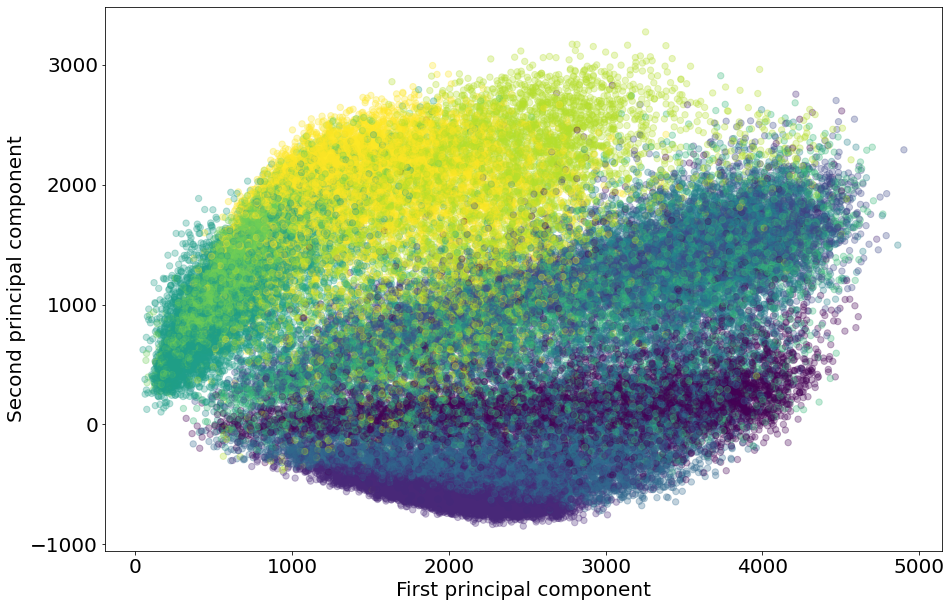

In [19]:
# Run PCA on the fashion-MNIST dataset

score, evectors, evals = pca(X_train)
first_two_features = score[:,:2]
plt.figure(figsize=(15,10))
plt.scatter(first_two_features[:, 0], first_two_features[:, 1], c=y_train, s=40, cmap='viridis', alpha=0.3)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

variance explained by first principle component: 0.2903922792136581
variance explained by second principle component: 0.1775530997816205
cumulated variance explained by two principle components: 0.46794537899527866


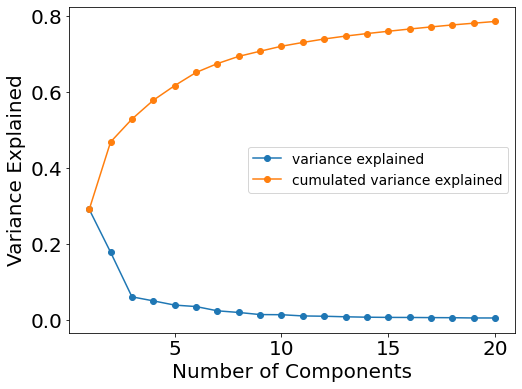

In [24]:
# Alternative method using SKLearn's PCA function and plotting scree plot

n = 20
pca = PCA(n_components=n)
rotatedData = pca.fit_transform(X_train)

var = pca.explained_variance_ratio_
var_explained = np.zeros(20)
for i in range(20):
    var_explained[i] = sum(var[:i+1])
    
print("variance explained by first principle component:", var[0])
print("variance explained by second principle component:", var[1])
print("cumulated variance explained by two principle components:", var_explained[1])
    
plt.figure(figsize = (8,6))
plt.plot(range(1, len(var_explained)+1), var, label="variance explained", marker="o")
plt.plot(range(1, len(var_explained)+1), var_explained, label="cumulated variance explained", marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained")
plt.legend(fontsize="x-small")
plt.show()

# Gaussian mixture modelling (15 marks):

Use a Gaussian Mixture Model (GMM) to do (soft) clustering using the first two components from the PCA analysis. 
Make the GMM a mixture of 10 gaussians

Rand accuracy score: 0.8720802080034668
Time taken to produce model: 2.699820041656494


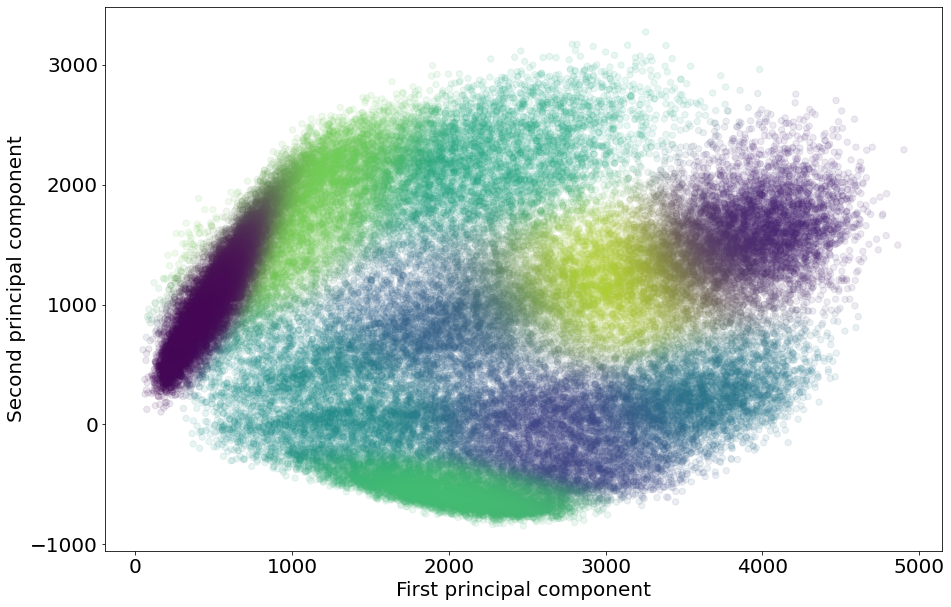

In [25]:
from matplotlib.colors import ListedColormap
from sklearn import mixture

colours = []
for i in range(0, 10):
    colours.append(matplotlib.cm.get_cmap('viridis')(i/10))

start = time.time()
model1 = mixture.GaussianMixture(n_components=10, covariance_type='full').fit(first_two_features)
probabilities = model1.predict_proba(first_two_features)
end = time.time()
plt.figure(figsize=(15,10))
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

pred = model1.predict(first_two_features)
print ("Rand accuracy score:", metrics.rand_score(pred, y_train))
print("Time taken to produce model:", end-start)

point_colours = []
for point_probs in probabilities:
    colour = point_probs @ colours
    a_index = len(colour)-1
    colour = colour[:a_index]
    point_colours.append(tuple(colour.tolist()))

plt.scatter(first_two_features[:, 0], first_two_features[:, 1], c=point_colours, s=40, cmap=ListedColormap(colours), alpha=0.1)


In [ ]:
# GMM using all of the data

colours = []
for i in range(0, 10):
    colours.append(matplotlib.cm.get_cmap('viridis')(i/10))

start = time.time()
model = mixture.GaussianMixture(n_components=10, covariance_type='full').fit(X_train)
probabilities = model.predict_proba(X_train)
end = time.time()
plt.figure(figsize=(15,10))
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

pred = model.predict(X_test)
print ("Rand accuracy score: ", metrics.rand_score(pred, y_test))
print("Time taken to produce model:", end-start)

point_colours = []
for point_probs in probabilities:
    colour = point_probs @ colours
    a_index = len(colour)-1
    colour = colour[:a_index]
    point_colours.append(tuple(colour.tolist()))

plt.scatter(first_two_features[:, 0], first_two_features[:, 1], c=point_colours, s=40, cmap=ListedColormap(colours), alpha=0.1)

In [118]:
pred = model.predict(X_train)
print ("Accuracy score: ", metrics.adjusted_mutual_info_score(pred, y_train))

pred1 = model1.predict(first_two_features)
print ("Accuracy score: ", metrics.adjusted_mutual_info_score(pred1, y_train))

Rand accuracy score:  0.49517892394240914
Rand accuracy score:  0.44071048915603395
